In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from crevprop import fracture
from crevprop.physical_constants import THERMAL_CONDUCTIVITY_ICE as kappa
import crevprop.physical_constants as pconst
from crevprop.iceblock import IceBlock, ThermalModel

In [2]:
# set up model domain for testing
# z-axis 

# meters
ice_thickness = 500.
crevasse_depth = 2.


depth_array = np.linspace(1,ice_thickness,num=101)
depth_array


array([  1.  ,   5.99,  10.98,  15.97,  20.96,  25.95,  30.94,  35.93,
        40.92,  45.91,  50.9 ,  55.89,  60.88,  65.87,  70.86,  75.85,
        80.84,  85.83,  90.82,  95.81, 100.8 , 105.79, 110.78, 115.77,
       120.76, 125.75, 130.74, 135.73, 140.72, 145.71, 150.7 , 155.69,
       160.68, 165.67, 170.66, 175.65, 180.64, 185.63, 190.62, 195.61,
       200.6 , 205.59, 210.58, 215.57, 220.56, 225.55, 230.54, 235.53,
       240.52, 245.51, 250.5 , 255.49, 260.48, 265.47, 270.46, 275.45,
       280.44, 285.43, 290.42, 295.41, 300.4 , 305.39, 310.38, 315.37,
       320.36, 325.35, 330.34, 335.33, 340.32, 345.31, 350.3 , 355.29,
       360.28, 365.27, 370.26, 375.25, 380.24, 385.23, 390.22, 395.21,
       400.2 , 405.19, 410.18, 415.17, 420.16, 425.15, 430.14, 435.13,
       440.12, 445.11, 450.1 , 455.09, 460.08, 465.07, 470.06, 475.05,
       480.04, 485.03, 490.02, 495.01, 500.  ])

NameError: name 'mu' is not defined

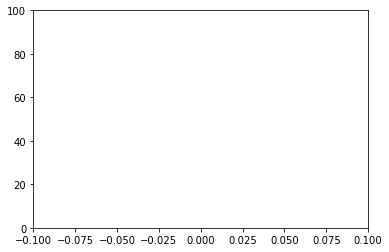

In [3]:
fig=plt.figure()
ax=fig.add_subplot(111,xlim=(-.1,.1),ylim=(0,100))
ax.plot(fracture.elastic_displacement(depth_array,120000,mu,70,50,has_water=True),depth_array,'.')
ax.plot(fracture.elastic_displacement(depth_array,120000,mu,70,50,has_water=True)*-1,depth_array,'.')
plt.gca().invert_yaxis()

Working on creating the temperature matrix and matrix inversion

Ac=T -> c=A'T

In [4]:
ice_thickness = 1000.
dt = 3600. * 12.
dx = np.sqrt(kappa*dt)
dz = 5
sx = kappa*dt/dx**2
sz = kappa*dt/dz**2


np.identity(16)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

## Testing iceblock.py

In [2]:
tprof = pd.read_csv('./data/foxxTemperatureProfile.csv',names=["T","z"])

In [3]:
ib = IceBlock(600,1,1,100/3,0.5,10)
tmod = ThermalModel(600,ib.length,ib.dt_T,1,tprof)

In [13]:
tmod.T.shape

(601, 196)

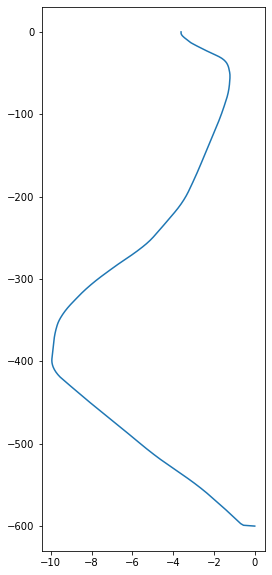

In [10]:
plt.figure(figsize=(4,10))
plt.plot(tmod.T_upglacier,tmod.z)

In [5]:
np.outer(tmod.T_upglacier,np.linspace(1,0.99,tmod.x.size)).shape

(601, 196)

In [11]:
T=pd.Series(np.interp(tmod.z,tprof['z'],tprof['T'])).rolling(27, min_periods=1, center=True).mean()
T

0     -0.828844
1     -0.851016
2     -0.873095
3     -0.895098
4     -0.917037
         ...   
596   -3.570329
597   -3.595214
598   -3.610073
599   -3.612901
600   -3.612901
Length: 601, dtype: float64

In [12]:
tprof['z'][

0    -610.000000
1    -606.000000
2    -597.000000
3    -583.000000
4    -552.000000
5    -511.000000
6    -502.000000
7    -442.000000
8    -441.000000
9    -410.000000
10   -362.000000
11   -342.657224
12   -307.869688
13   -273.951841
14   -262.000000
15   -240.033994
16   -206.116147
17   -172.198300
18   -137.410765
19   -103.492918
20    -69.575071
21    -49.572238
22    -44.354108
23    -40.005666
24    -35.657224
25    -30.439093
26    -25.220963
27    -20.002833
28    -14.784703
29      0.000000
Name: z, dtype: float64

In [5]:
tmod.z.size

601

In [6]:
tmod.T_upglacier.size

602

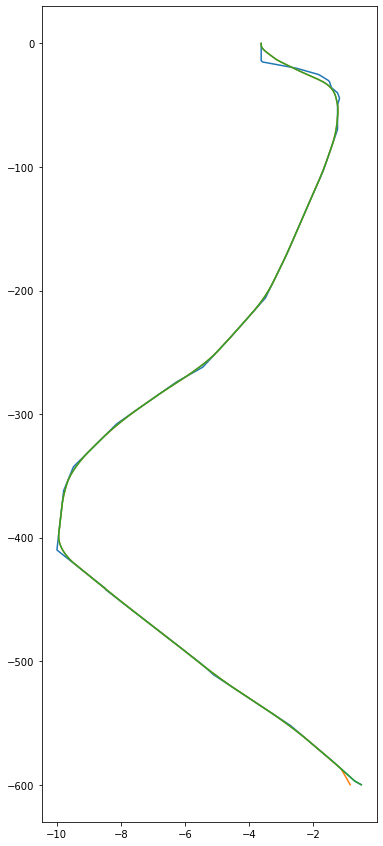

In [327]:
T=np.interp(tmod.z,tprof["z"].values,tprof["T"].values)
fig=plt.figure(figsize=(6,15))
plt.plot(T,tmod.z)
plt.plot(pd.Series(T).rolling(27,min_periods=1,center=True).mean().values,tmod.z)
# ensure bed temperature is preserved

plt.plot(pd.Series(T)[:27].append(pd.Series(T).rolling(27,min_periods=1,center=True).mean()[27:]),tmod.z)
# plt.plot(pd.Series(T).rolling(27,min_periods=1,center=True,win_type="gaussian").mean(std=27/8).values,tmod.z)